In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile, os

# Path jaha tumhara dataset pada hai
zip_path = "/content/drive/MyDrive/Garbage Detection.v1i.yolov8.zip"

# Extract folder
extract_path = "/content/dataset"

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)
print("Folders:", os.listdir(extract_path))

✅ Dataset extracted to: /content/dataset
Folders: ['valid', 'train', 'README.dataset.txt', 'test', 'README.roboflow.txt', 'data.yaml']


In [8]:
!pip install ultralytics

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

# apna model load karo ya training ke liye new model banao
model = YOLO("yolov8n.pt")   # base model (tiny, fast)

# dataset config check karne ke liye
with open("/content/dataset/data.yaml", "r") as f:
    print(f.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 6
names: ['biodegradable', 'cardboard', 'glass', 'metal', 'paper', 'plastic']

roboflow:
  workspace: garbagedetection-a0bau
  project: garbage-detection-z5out-viutn
  version: 1
  license: MIT
  url: https://universe.roboflow.com/garbagedetection-a0bau/garbage-detection-z5out-viutn/dataset/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from ultralytics import YOLO

model = YOLO("yolov8s.pt")

results = model.train(
    data="/content/dataset/data.yaml",
    epochs=60,
    imgsz=640,               # standard input size
    batch=16,                # GPU memory ke hisaab se adjust
    optimizer="AdamW",       # fast aur effective
    patience=12,             # early stopping
    project="/content/drive/MyDrive/garbage_yolo",
    name="exp1_showcase",    # experiment name
    save=True,
    plots=True
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp1_showcase, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=12, perspective=0.0, plots=True, pose=12.0, pret

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 18                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 19                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2118370  ultralytics.nn.modules.head.Detect           [6, [128, 256, 512]]          
Model summary: 129 layers, 11,137,922 parameters, 11,137,906 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 361.8±184.9 MB/s, size: 11.4 KB)


train: Scanning /content/dataset/train/labels... 6612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6612/6612 [00:03<00:00, 1713.24it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 253.7±108.7 MB/s, size: 7.3 KB)


val: Scanning /content/dataset/valid/labels... 1856 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1856/1856 [00:01<00:00, 1156.94it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/garbage_yolo/exp1_showcase/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/garbage_yolo/exp1_showcase
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      7.51G       1.67      2.371      1.653         17        640: 100%|██████████| 414/414 [02:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:23<00:00,  2.46it/s]


                   all       1856      17305      0.195      0.154      0.112     0.0522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      4.72G      1.663      2.267      1.691         70        640: 100%|██████████| 414/414 [02:16<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.32it/s]


                   all       1856      17305      0.319      0.131      0.126      0.064

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      6.51G      1.581      2.122       1.61         14        640: 100%|██████████| 414/414 [02:18<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.33it/s]


                   all       1856      17305      0.236      0.197      0.171     0.0925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      6.53G      1.552      2.044      1.579         52        640: 100%|██████████| 414/414 [02:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.28it/s]


                   all       1856      17305       0.31      0.285      0.247      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      6.58G      1.492      1.913       1.54         65        640: 100%|██████████| 414/414 [02:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.45it/s]


                   all       1856      17305      0.378      0.266      0.257      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      6.61G      1.461      1.827      1.514         89        640: 100%|██████████| 414/414 [02:18<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.46it/s]


                   all       1856      17305      0.333      0.266      0.258      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      6.66G      1.442      1.822      1.504         17        640: 100%|██████████| 414/414 [02:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.35it/s]


                   all       1856      17305      0.293      0.243      0.216      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      6.68G      1.421      1.756      1.475         17        640: 100%|██████████| 414/414 [02:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.47it/s]


                   all       1856      17305      0.346      0.315      0.303      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      6.73G      1.388      1.703      1.458         53        640: 100%|██████████| 414/414 [02:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.45it/s]


                   all       1856      17305      0.454      0.319      0.332      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      6.75G      1.377      1.674      1.457         15        640: 100%|██████████| 414/414 [02:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.53it/s]


                   all       1856      17305      0.416      0.319      0.316      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60       6.8G      1.351      1.644      1.441         41        640: 100%|██████████| 414/414 [02:17<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.24it/s]


                   all       1856      17305      0.408      0.326      0.326      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      6.82G      1.337      1.592      1.425         68        640: 100%|██████████| 414/414 [02:20<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.36it/s]


                   all       1856      17305      0.427      0.338      0.351      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      6.88G       1.33      1.569      1.423         97        640: 100%|██████████| 414/414 [02:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.64it/s]


                   all       1856      17305      0.441      0.343      0.353      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60       6.9G      1.328      1.545      1.412         18        640: 100%|██████████| 414/414 [02:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.51it/s]

                   all       1856      17305       0.43      0.343      0.353      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      6.95G      1.317      1.538      1.411         34        640: 100%|██████████| 414/414 [02:20<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.23it/s]


                   all       1856      17305       0.46      0.373      0.378      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      6.97G      1.291      1.501      1.395         25        640: 100%|██████████| 414/414 [02:14<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.48it/s]


                   all       1856      17305      0.485      0.357      0.383      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      7.02G      1.297      1.486       1.39         43        640: 100%|██████████| 414/414 [02:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.52it/s]

                   all       1856      17305      0.499      0.345      0.392       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      7.04G      1.276      1.465      1.385         18        640: 100%|██████████| 414/414 [02:14<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:17<00:00,  3.34it/s]

                   all       1856      17305      0.508      0.364      0.386      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      7.09G      1.266      1.427      1.382         28        640: 100%|██████████| 414/414 [02:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.54it/s]


                   all       1856      17305      0.536       0.38       0.43      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      7.12G      1.256      1.402      1.368         32        640: 100%|██████████| 414/414 [02:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.52it/s]

                   all       1856      17305      0.539      0.368      0.416      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      7.17G      1.261      1.394      1.366         78        640: 100%|██████████| 414/414 [02:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.54it/s]


                   all       1856      17305      0.542      0.382      0.435      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      7.19G      1.242      1.378      1.361         45        640: 100%|██████████| 414/414 [02:15<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.54it/s]


                   all       1856      17305      0.519      0.396      0.431      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      7.24G      1.252      1.357      1.358         26        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.42it/s]


                   all       1856      17305      0.523      0.383      0.429      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      7.26G      1.254      1.338      1.355         17        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.49it/s]


                   all       1856      17305      0.524      0.404      0.454      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      7.31G       1.24      1.343      1.349        129        640: 100%|██████████| 414/414 [02:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.53it/s]


                   all       1856      17305      0.508       0.42      0.435        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      7.33G      1.219      1.294      1.339         49        640: 100%|██████████| 414/414 [02:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.50it/s]


                   all       1856      17305      0.498      0.406      0.439      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      7.38G      1.212       1.28      1.333         23        640: 100%|██████████| 414/414 [02:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.56it/s]


                   all       1856      17305       0.52      0.393      0.413      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      5.79G      1.221       1.28      1.336         21        640: 100%|██████████| 414/414 [02:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.46it/s]

                   all       1856      17305      0.555      0.401      0.456      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      5.79G      1.198      1.257      1.326         49        640: 100%|██████████| 414/414 [02:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.60it/s]


                   all       1856      17305      0.532      0.416      0.443      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      5.79G      1.204      1.248      1.323         19        640: 100%|██████████| 414/414 [02:18<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.56it/s]


                   all       1856      17305       0.54      0.425       0.47      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      5.79G      1.194      1.229       1.32         33        640: 100%|██████████| 414/414 [02:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.44it/s]


                   all       1856      17305       0.54       0.44      0.469      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      5.79G      1.171      1.186      1.303         27        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.58it/s]


                   all       1856      17305      0.526      0.449      0.455      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      5.79G       1.17      1.197      1.302         41        640: 100%|██████████| 414/414 [02:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.44it/s]


                   all       1856      17305      0.567      0.425      0.483      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60       5.8G      1.171      1.185      1.304         46        640: 100%|██████████| 414/414 [02:14<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.61it/s]

                   all       1856      17305      0.558      0.443      0.493       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      5.85G      1.174      1.167      1.304         40        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.55it/s]

                   all       1856      17305       0.55      0.448       0.49       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      5.88G       1.17       1.15      1.302        261        640: 100%|██████████| 414/414 [02:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.44it/s]


                   all       1856      17305      0.579      0.448      0.501      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      5.92G      1.167      1.161      1.304         19        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.56it/s]


                   all       1856      17305      0.578      0.453      0.506      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      5.95G      1.152      1.132       1.29        140        640: 100%|██████████| 414/414 [02:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.57it/s]

                   all       1856      17305      0.584      0.445      0.507      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60         6G      1.144      1.111      1.288         37        640: 100%|██████████| 414/414 [02:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.58it/s]

                   all       1856      17305      0.589      0.432      0.492      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      6.86G      1.145       1.09      1.283         50        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.57it/s]


                   all       1856      17305      0.579      0.454      0.509      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      6.91G      1.131      1.062      1.279         69        640: 100%|██████████| 414/414 [02:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.53it/s]


                   all       1856      17305      0.584      0.457      0.493      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      6.93G      1.152      1.091      1.284         47        640: 100%|██████████| 414/414 [02:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.55it/s]


                   all       1856      17305       0.61      0.449      0.522      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      6.98G      1.141       1.08      1.279        122        640: 100%|██████████| 414/414 [02:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.43it/s]


                   all       1856      17305      0.589      0.456      0.518      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60         7G      1.129      1.064      1.277         49        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.58it/s]


                   all       1856      17305      0.618      0.436       0.52      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      7.05G      1.117      1.036      1.265         52        640: 100%|██████████| 414/414 [02:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.48it/s]


                   all       1856      17305      0.577      0.471       0.53      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      7.07G      1.096      1.039      1.261         34        640: 100%|██████████| 414/414 [02:15<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.59it/s]

                   all       1856      17305      0.605      0.473      0.538       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      7.12G      1.107      1.017      1.262         42        640: 100%|██████████| 414/414 [02:16<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.58it/s]


                   all       1856      17305      0.603      0.469      0.537      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      7.15G      1.114      1.006      1.258         19        640: 100%|██████████| 414/414 [02:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.58it/s]

                   all       1856      17305      0.612      0.473       0.54      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60       7.2G      1.109      1.001      1.254         50        640: 100%|██████████| 414/414 [02:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.61it/s]


                   all       1856      17305      0.602      0.484      0.536      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      7.22G      1.099      0.991      1.255        192        640: 100%|██████████| 414/414 [02:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.55it/s]

                   all       1856      17305      0.614      0.479       0.54       0.38


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      7.27G        1.1     0.9558      1.267          6        640: 100%|██████████| 414/414 [02:10<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:16<00:00,  3.59it/s]


                   all       1856      17305      0.589      0.479      0.526      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      7.29G      1.082     0.9412      1.255        137        640: 100%|██████████| 414/414 [02:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.63it/s]


                   all       1856      17305      0.591      0.485      0.526      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      7.34G      1.071     0.9159      1.246         24        640: 100%|██████████| 414/414 [02:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.66it/s]


                   all       1856      17305      0.595      0.485      0.534      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      7.37G      1.059       0.89      1.236         54        640: 100%|██████████| 414/414 [02:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.74it/s]


                   all       1856      17305      0.586      0.489      0.534       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      6.01G      1.043     0.8952      1.237         21        640: 100%|██████████| 414/414 [02:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.73it/s]


                   all       1856      17305      0.582      0.487      0.523      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      6.92G      1.052     0.8758      1.233         21        640: 100%|██████████| 414/414 [02:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.73it/s]


                   all       1856      17305      0.573        0.5      0.534      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      6.92G      1.046     0.8637       1.23         76        640: 100%|██████████| 414/414 [02:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.73it/s]


                   all       1856      17305        0.6      0.491       0.53      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      6.92G      1.037     0.8511      1.228         11        640: 100%|██████████| 414/414 [02:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.74it/s]


                   all       1856      17305      0.574      0.505      0.532      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      6.92G      1.047     0.8496       1.23         18        640: 100%|██████████| 414/414 [02:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.72it/s]


                   all       1856      17305      0.583        0.5      0.536      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      6.92G      1.036     0.8342      1.221         41        640: 100%|██████████| 414/414 [02:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:15<00:00,  3.70it/s]


                   all       1856      17305       0.59      0.497      0.536       0.38

60 epochs completed in 2.508 hours.
Optimizer stripped from /content/drive/MyDrive/garbage_yolo/exp1_showcase/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/garbage_yolo/exp1_showcase/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/garbage_yolo/exp1_showcase/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:21<00:00,  2.73it/s]


                   all       1856      17305      0.614      0.479       0.54       0.38
         biodegradable        590      12636      0.778      0.524      0.647      0.369
             cardboard        438       1292      0.804      0.491       0.62      0.474
                 glass        762       2268      0.874      0.673       0.79      0.613
                 metal        263        871      0.735      0.586      0.651      0.443
                 paper         15         33     0.0243     0.0606     0.0695     0.0673
               plastic         85        205       0.47       0.54      0.464      0.313
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/garbage_yolo/exp1_showcase


In [11]:
from ultralytics import YOLO

# apna trained model load karo
model = YOLO("/content/drive/MyDrive/garbage_yolo/exp1_showcase/weights/best.pt")

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  168.636         1.66956         2.37131         1.65290   
1      2  324.013         1.66271         2.26725         1.69086   
2      3  480.739         1.58130         2.12225         1.61021   
3      4  636.705         1.55207         2.04437         1.57872   
4      5  791.390         1.49155         1.91291         1.53952   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.19456            0.15421           0.11235   
1               0.31922            0.13051           0.12574   
2               0.23563            0.19729           0.17060   
3               0.30981            0.28504           0.24659   
4               0.37771            0.26620           0.25682   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.05219       2.08821       5.48569       2.21076  0.070072   
1              0.06402       1.89633       2

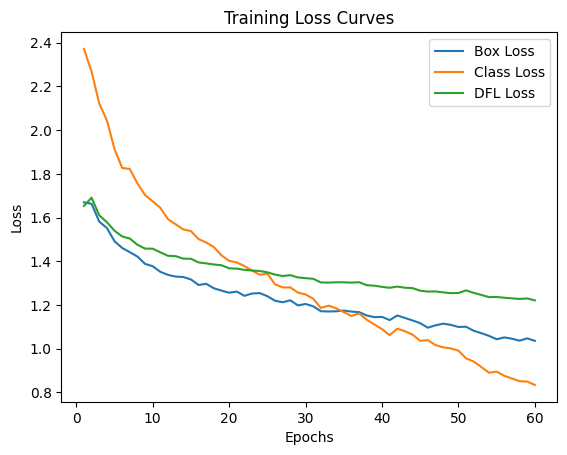

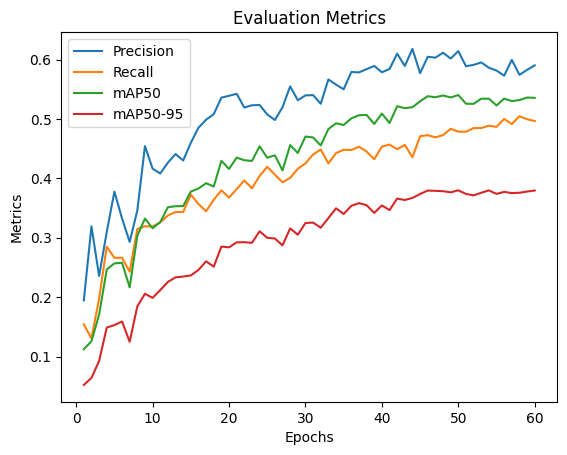

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# apna results.csv ka path do (training wale folder ke andar hoga)
df = pd.read_csv("/content/drive/MyDrive/garbage_yolo/exp1_showcase/results.csv")

# Columns check karo
print(df.head())

# 1. Training losses
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curves")
plt.show()

# 2. Metrics
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()
plt.title("Evaluation Metrics")
plt.show()


In [22]:
from google.colab import files

# Image upload karo
uploaded = files.upload()

Saving image1.jpeg to image1.jpeg



image 1/1 /content/image1.jpeg: 640x480 1 metal, 1 plastic, 444.1ms
Speed: 4.4ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


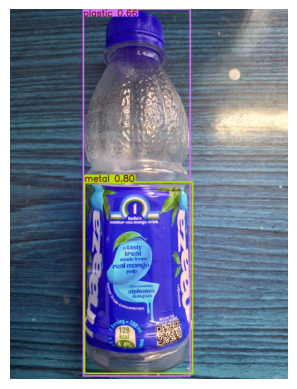

In [23]:
import matplotlib.pyplot as plt

# Run prediction
results = model.predict(source="image1.jpeg", conf=0.5)

# Pehla result lo
res = results[0]

# Annotated image banao
annotated_img = res.plot()   # numpy array with bounding boxes

# Show image in notebook
plt.imshow(annotated_img)
plt.axis("off")
plt.show()

In [12]:
from google.colab import files

# Video upload karo
uploaded = files.upload()

# Colab me filename store kar lo
video_file = list(uploaded.keys())[0]
print("Uploaded video:", video_file)

Saving video_final.mp4 to video_final (1).mp4
Uploaded video: video_final (1).mp4


In [18]:
from ultralytics import YOLO
# Video pe prediction run karo
results = model.predict(source=video_file, conf=0.5, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/437) /content/video_final (1).mp4: 640x384 1 biodegradable, 534.1ms
video 1/1 (frame 2/437) /content/video_final (1).mp4: 640x384 1 biodegradable, 343.3ms
video 1/1 (frame 3/437) /content/video_final (1).mp4: 640x384 1 biodegradable, 348.2ms
video 1/1 (frame 4/437) /content/video_final (1).mp4: 640x384 1 biodegradable, 356.3ms
video 1/1 (frame 5/437) /content/video_final (1).mp4: 640x384 1 biodegradable, 349.4ms
video 1/1 (frame 6/43

In [19]:
!ls runs/detect/predict

'video_final (1).avi'


In [21]:
from google.colab import files
files.download("runs/detect/predict/video_final (1).avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>